### importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

### importing dataset

In [2]:
df=pd.read_csv('train_v9rqX0R.csv')

### EDA

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.shape

(8523, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [7]:
df.isnull().sum()
# We can see null values here

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [9]:
# Null values imputation
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())
df['Outlet_Size']=df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [10]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

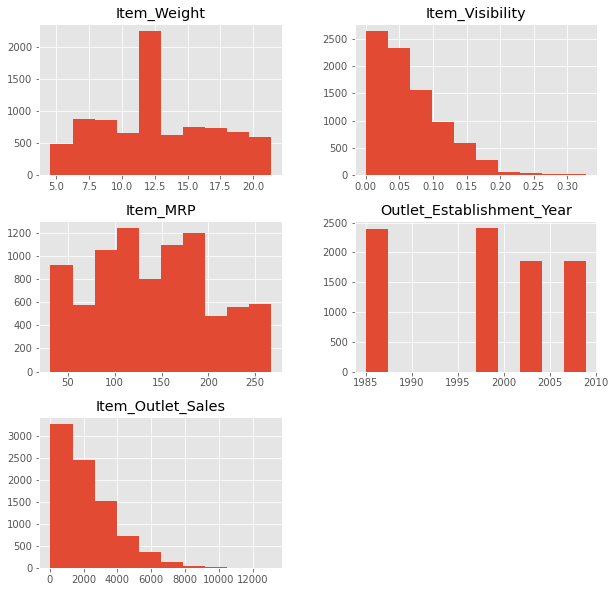

In [11]:
# Having look at numerical features in dataset
df.hist()
his=plt.gcf()
his.set_size_inches(10,10)
plt.show()

In [12]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [13]:
# 7 columns are categorical
cat=df.select_dtypes(include=[np.object])
cat.shape[1]

7

In [14]:
# 5columns are numerical
cat=df.select_dtypes(include=[np.int64,np.float64])
cat.shape[1]

5

In [15]:
### Having look at categorical values pf our dataset

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

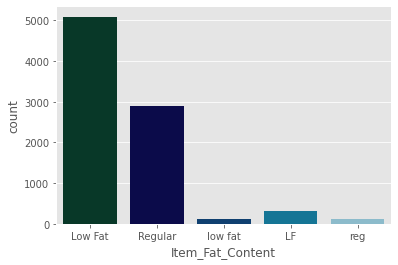

In [16]:
sns.countplot(x='Item_Fat_Content',data=df,palette='ocean')

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

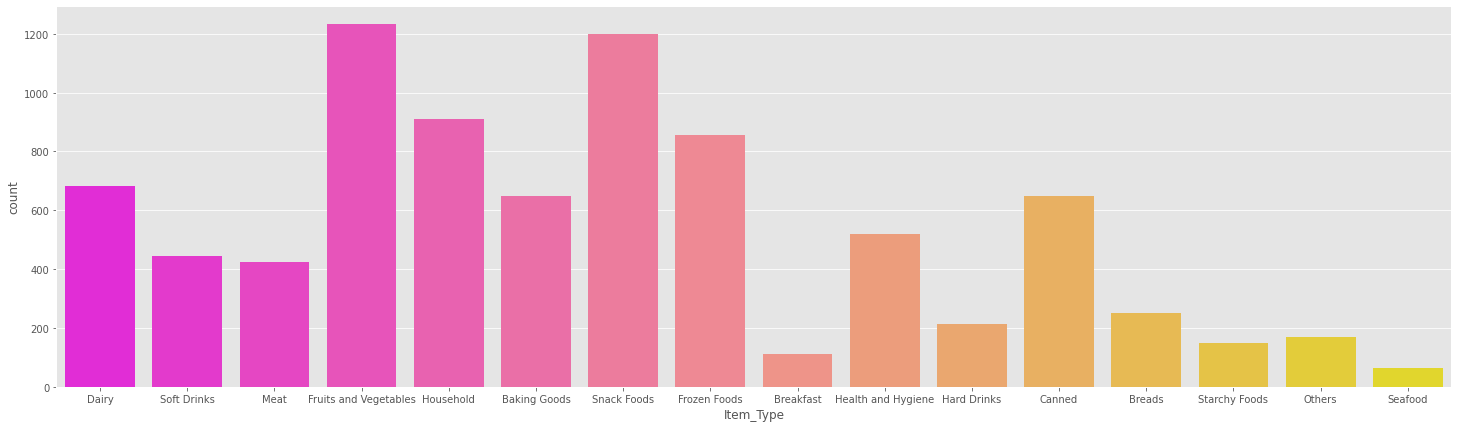

In [17]:
plt.figure(figsize=(25,7))
sns.countplot(x='Item_Type',data=df,palette='spring')

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

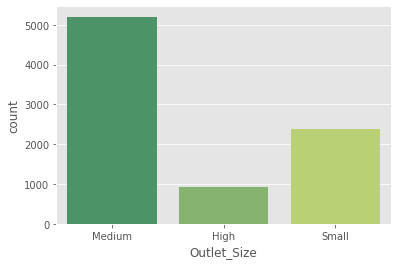

In [18]:
sns.countplot(x='Outlet_Size',data=df,palette='summer')

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

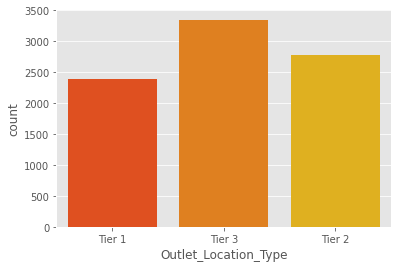

In [19]:
sns.countplot(x='Outlet_Location_Type',data=df,palette='autumn')

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

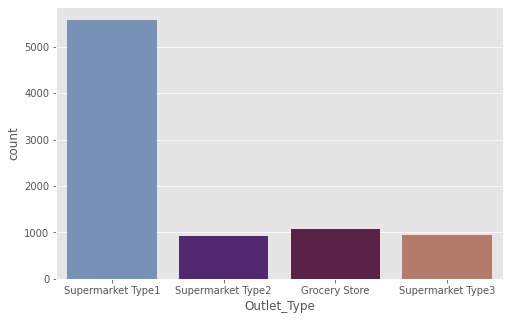

In [20]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Type',data=df,palette='twilight')

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

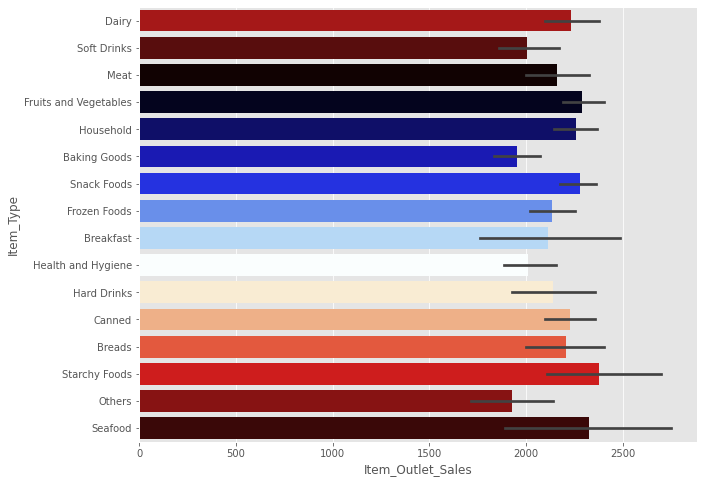

In [21]:
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=df,palette='flag')
# we can see that Diary,Fruite and veggies,Snack food,Seafood,Starchy foods have more selling

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Fat_Content'>

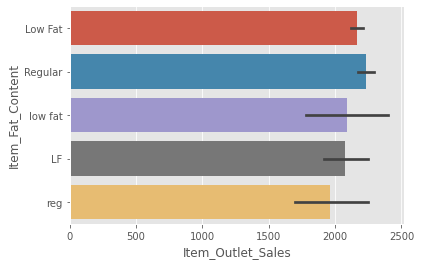

In [22]:
sns.barplot(y='Item_Fat_Content',x='Item_Outlet_Sales',data=df)
# From here we can see that items having regular fat content have more selling 

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Outlet_Size'>

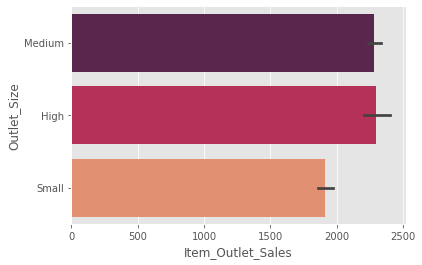

In [23]:
sns.barplot(y='Outlet_Size',x='Item_Outlet_Sales',data=df,palette='rocket')
# Outlets having medium and high size have more selling

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Outlet_Location_Type'>

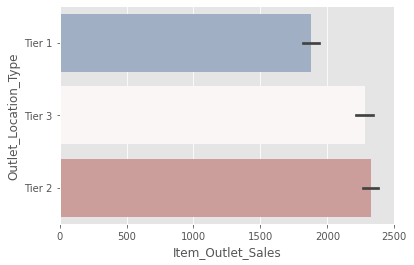

In [24]:
sns.barplot(y='Outlet_Location_Type',x='Item_Outlet_Sales',data=df,palette='vlag')
# Tier 2 outlet Location type have more selling

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Outlet_Type'>

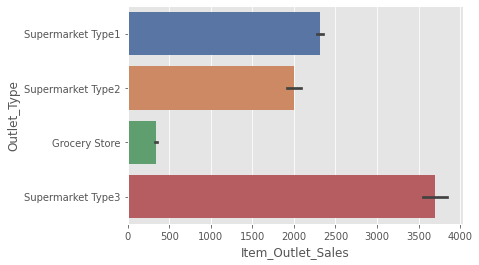

In [25]:
sns.barplot(y='Outlet_Type',x='Item_Outlet_Sales',data=df,palette='deep')
# Supermarket type 3 have more selling

### Label Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
a= df.select_dtypes(include='object').columns
for i in a:
    df[i] = le.fit_transform(df[i])

In [27]:
df.dtypes

Item_Identifier                int32
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

<AxesSubplot:>

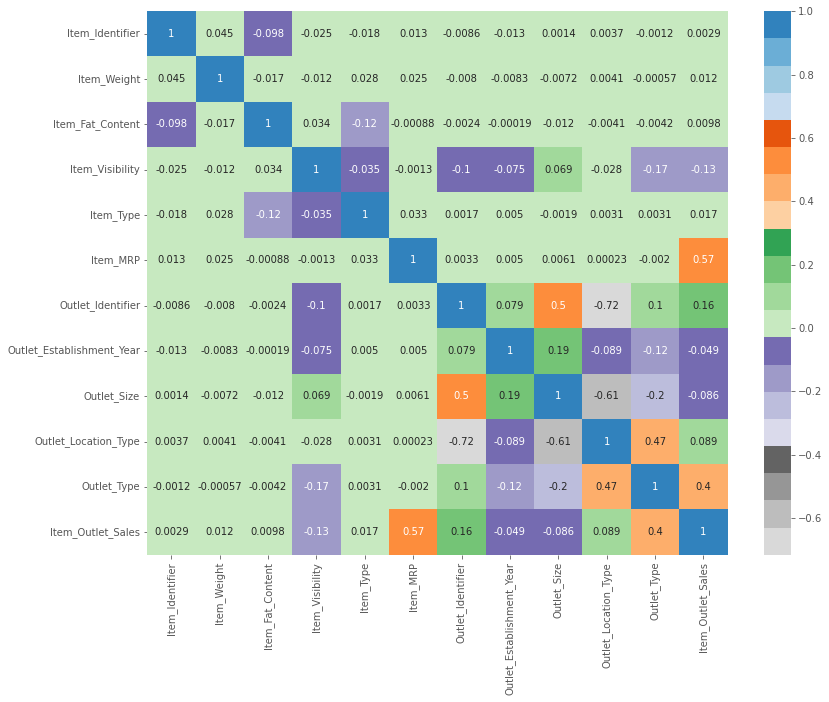

In [28]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True,cmap='tab20c_r')

### Separating dependent and independent variables

In [29]:
X=df.drop('Item_Outlet_Sales',axis=1)
y=df.Item_Outlet_Sales

### Performing train-test split

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Feature scaling

In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

### Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [33]:
lr.score(X_train,y_train)

0.5063667106696854

In [34]:
lr.score(X_test,y_test)

0.520625362896495

### Xgboost Regressor

In [35]:
from xgboost import XGBRegressor
xr=XGBRegressor()
xr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [36]:
xr.score(X_train,y_train)

0.8553051025245499

In [37]:
xr.score(X_test,y_test)

0.5286509025439625

In [38]:
y_hat=lr.predict(X_test)

In [39]:
from sklearn.metrics import mean_squared_error
a=mean_squared_error(y_test,y_hat)

In [40]:
from math import sqrt

In [41]:
sqrt(a)

1141.45780226103

In [42]:
y_hat2=xr.predict(X_test)
b=mean_squared_error(y_test,y_hat2)

In [43]:
sqrt(b)

1131.862508351751